In [1]:
from mnemonic import Mnemonic
from bip32utils import BIP32Key
import os

os.chdir("..")
import wallet


In [2]:
WALLET_API = "http://localhost:7101"

In [3]:
mnemon = Mnemonic('english')
words = mnemon.generate(128)

In [4]:
print(words)

lady bronze live observe emotion orchard master gap bracket major bar media


In [5]:
private_key = BIP32Key.fromEntropy(mnemon.to_seed(words)).PrivateKey().hex()
private_key

'eaae9a018f24a1cf18133d7ecba45c2ed75895c8ecaec72dccb8fa595c94af04'

In [6]:
w=wallet.Wallet(WALLET_API, private_key)

In [7]:
w.getbalance()

{'availableAmount': 0,
 'totalAmount': 0,
 'totalTopups': 0,
 'notConfirmedTopups': 0,
 'settledEarnings': 0,
 'totalEarnings': 0,
 'totalPayments': 0,
 'inFlightPayments': 0,
 'totalPayouts': 0,
 'inProgressPayouts': 0,
 'totalPaymentFees': 0,
 'inFlightPaymentFees': 0,
 'totalPayoutOnChainFees': 0,
 'inProgressPayoutOnChainFees': 0,
 'totalPayoutFees': 0,
 'inProgressPayoutFees': 0}

In [8]:
w.topupandmine6blocks(w.newaddress(),100000)

In [9]:
w.getbalance()

{'availableAmount': 0,
 'totalAmount': 100000,
 'totalTopups': 100000,
 'notConfirmedTopups': 100000,
 'settledEarnings': 0,
 'totalEarnings': 0,
 'totalPayments': 0,
 'inFlightPayments': 0,
 'totalPayouts': 0,
 'inProgressPayouts': 0,
 'totalPaymentFees': 0,
 'inFlightPaymentFees': 0,
 'totalPayoutOnChainFees': 0,
 'inProgressPayoutOnChainFees': 0,
 'totalPayoutFees': 0,
 'inProgressPayoutFees': 0}

In [21]:
invoice = w.addinvoice(1000,"test",30)
invoice

{'paymentRequest': 'lnbcrt10u1pn7k837pp5kt653rdgkurg8jsxnkfauyel9tyqmkgjae0hy4js3qdrek3ekpfqdq8w3jhxaqcqzzsxqp7sp5722hkcx869t5aq80jdu470uydxpzve60e6y9ca70saj5ktv0dnws9p4gqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqpqysgq34y0xkx4gtuxlpz3tgp0js2jzunhs8wds9uackdng4wal6rqerw8kunx4yn8vggpu3qsymzj97dwvdzryg9y85qefqdf2gl76s0ldygqndhjyt',
 'state': 0,
 'isHodl': False,
 'settleTime': None,
 'paymentHash': 'b2f5488da8b70683ca069d93de133f2ac80dd912ee5f725650881a3cda39b052',
 'satoshis': 1000,
 'paymentAddr': 'f2957b60c7d1574e80ef93795f3f84698226674fce885c77cf87654b2d8f6cdd',
 'memo': 'test',
 'creationTime': '2025-03-31T22:59:10Z',
 'expiryTime': '2025-03-31T22:59:40Z'}

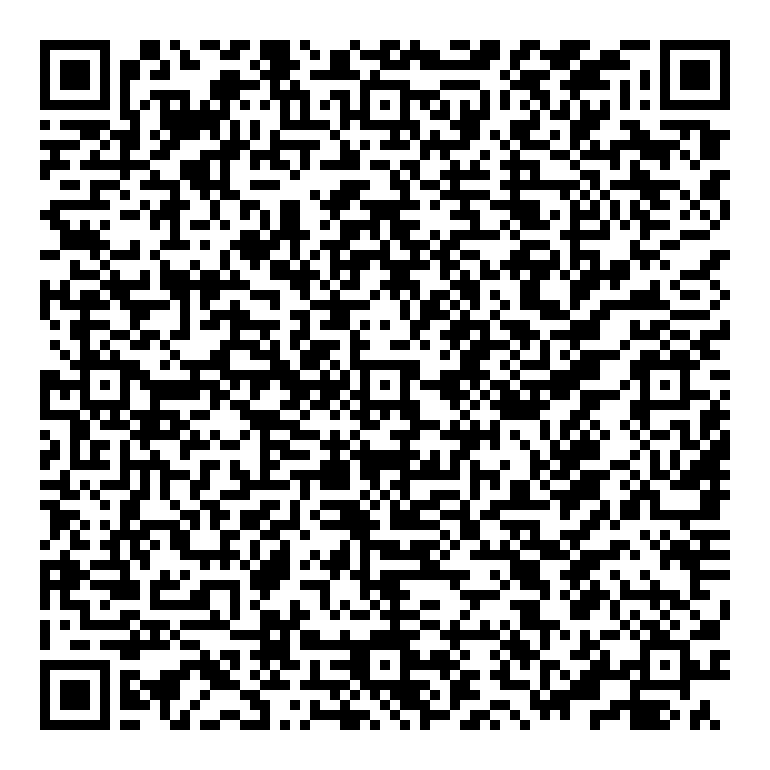

In [22]:
import qrcode
img = qrcode.make(invoice["paymentRequest"])
img

In [ ]:
invoicestateupdates = w.invoicestateupdates()

Connection started
Connection started
Negotiate url:http://localhost:7101/invoicestateupdates/negotiate?authtoken=CkAKEgoQYZkanJK3QR6coz4RnxVlcBIiCiD4oI9Y5VGrbT3TFfBehHoJ3%2BDS1qPGXr7OAGbKLOW20xoGCL%2B8rL8GEkIKQAESAgUVqW6nTLvrs6ga7%2BZ%2Bbf5wcQqbqn7ut9C01HujJmkpWjjydQiDnQZ/O0ypgrmkNQ3TGi7V4SAQoDe3VGQ%3D
Negotiate url:http://localhost:7101/invoicestateupdates/negotiate?authtoken=CkAKEgoQYZkanJK3QR6coz4RnxVlcBIiCiD4oI9Y5VGrbT3TFfBehHoJ3%2BDS1qPGXr7OAGbKLOW20xoGCL%2B8rL8GEkIKQAESAgUVqW6nTLvrs6ga7%2BZ%2Bbf5wcQqbqn7ut9C01HujJmkpWjjydQiDnQZ/O0ypgrmkNQ3TGi7V4SAQoDe3VGQ%3D
Response status code200
Response status code200
start url:ws://localhost:7101/invoicestateupdates?authtoken=CkAKEgoQYZkanJK3QR6coz4RnxVlcBIiCiD4oI9Y5VGrbT3TFfBehHoJ3%2BDS1qPGXr7OAGbKLOW20xoGCL%2B8rL8GEkIKQAESAgUVqW6nTLvrs6ga7%2BZ%2Bbf5wcQqbqn7ut9C01HujJmkpWjjydQiDnQZ%2FO0ypgrmkNQ3TGi7V4SAQoDe3VGQ%3D&id=TxfHIQR5_IunT8SI7nru8g
start url:ws://localhost:7101/invoicestateupdates?authtoken=CkAKEgoQYZkanJK3QR6coz4RnxVlcBIiCiD4oI9Y5

--- response header ---
HTTP/1.1 101 Switching Protocols
Connection: Upgrade
Date: Mon, 31 Mar 2025 22:59:12 GMT
Server: Kestrel
Upgrade: websocket
Sec-WebSocket-Accept: pCbz0+Ie/J5NQFEICv8/xMMPZzw=
-----------------------
-- web socket open --
-- web socket open --
Sending message <signalrcore.messages.handshake.request.HandshakeRequestMessage object at 0x111105780>
Sending message <signalrcore.messages.handshake.request.HandshakeRequestMessage object at 0x111105780>
{"protocol": "json", "version": 1}
{"protocol": "json", "version": 1}
++Sent raw: b'\x81\xa3\x10\xeaX\x81k\xc8(\xf3\x7f\x9e7\xe2\x7f\x86z\xbb0\xc82\xf2\x7f\x84z\xad0\xc8.\xe4b\x991\xee~\xc8b\xa1!\x97F'
++Sent decoded: fin=1 opcode=1 data=b'{"protocol": "json", "version": 1}\x1e'
++Rcv raw: b'\x81\x03{}\x1e'
++Rcv decoded: fin=1 opcode=1 data=b'{}\x1e'
Message received{}
Message received{}
Evaluating handshake {}
Evaluating handshake {}


connection opened and handshake received ready to send messages


Sending message <signalrcore.messages.ping_message.PingMessage object at 0x111106200>
Sending message <signalrcore.messages.ping_message.PingMessage object at 0x111106200>
{"type": 6}
{"type": 6}
++Sent raw: b'\x81\x8c\xe9:\xee6\x92\x18\x9aO\x99_\xcc\x0c\xc9\x0c\x93('
++Sent decoded: fin=1 opcode=1 data=b'{"type": 6}\x1e'
++Rcv raw: b'\x81\x0b{"type":6}\x1e'
++Rcv decoded: fin=1 opcode=1 data=b'{"type":6}\x1e'
Message received{"type":6}
Message received{"type":6}
Raw message incomming: 
Raw message incomming: 
{"type":6}
{"type":6}
Sending message <signalrcore.messages.ping_message.PingMessage object at 0x10d9041f0>
Sending message <signalrcore.messages.ping_message.PingMessage object at 0x10d9041f0>
{"type": 6}
{"type": 6}
++Sent raw: b'\x81\x8cL\x06\xb5\x987$\xc1\xe1<c\x97\xa2l0\xc8\x86'
++Sent decoded: fin=1 opcode=1 data=b'{"type": 6}\x1e'
++Rcv raw: b'\x81\x0b{"type":6}\x1e'
++Rcv decoded: fin=1 opcode=1 data=b'{"type":6}\x1e'
Message received{"type":6}
Message received{"

In [24]:
invoicestateupdates.stream(lambda x: print("AAAAAAAA",x), lambda e,x: print(x))

Sending message <signalrcore.messages.stream_invocation_message.StreamInvocationMessage object at 0x111107460>
Sending message <signalrcore.messages.stream_invocation_message.StreamInvocationMessage object at 0x111107460>
{"type": 4, "headers": {}, "target": "StreamAsync", "arguments": ["CkAKEgoQYZkanJK3QR6coz4RnxVlcBIiCiD4oI9Y5VGrbT3TFfBehHoJ3+DS1qPGXr7OAGbKLOW20xoGCMG8rL8GEkIKQDzzxuW4bI/LUYWg2wRaNtJ5KLKGWODqpYdfyDP+6rg5co0iyMXgPJWNCvFE32CLFHNf0HE/gV8D+Ygd6x44qgU="], "invocationId": "0ab22e2b-61d3-46e2-a390-45d3132d6313", "streamIds": []}
{"type": 4, "headers": {}, "target": "StreamAsync", "arguments": ["CkAKEgoQYZkanJK3QR6coz4RnxVlcBIiCiD4oI9Y5VGrbT3TFfBehHoJ3+DS1qPGXr7OAGbKLOW20xoGCMG8rL8GEkIKQDzzxuW4bI/LUYWg2wRaNtJ5KLKGWODqpYdfyDP+6rg5co0iyMXgPJWNCvFE32CLFHNf0HE/gV8D+Ygd6x44qgU="], "invocationId": "0ab22e2b-61d3-46e2-a390-45d3132d6313", "streamIds": []}
++Sent raw: b'\x81\xfe\x01D"\x14fgY6\x12\x1eRqD]\x02 JG\x00|\x03\x06Fq\x14\x14\x00.F\x1c_8FEVu\x14\x00G`D]\x0265\x13Pq\x07\ncg\x

In [20]:
w.cancelinvoice(invoice["paymentHash"])

In [25]:
w.getinvoice(invoice["paymentHash"])

{'paymentRequest': 'lnbcrt10u1pn7k837pp5kt653rdgkurg8jsxnkfauyel9tyqmkgjae0hy4js3qdrek3ekpfqdq8w3jhxaqcqzzsxqp7sp5722hkcx869t5aq80jdu470uydxpzve60e6y9ca70saj5ktv0dnws9p4gqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqpqysgq34y0xkx4gtuxlpz3tgp0js2jzunhs8wds9uackdng4wal6rqerw8kunx4yn8vggpu3qsymzj97dwvdzryg9y85qefqdf2gl76s0ldygqndhjyt',
 'state': 2,
 'isHodl': False,
 'settleTime': '1970-01-01T00:00:00Z',
 'paymentHash': 'b2f5488da8b70683ca069d93de133f2ac80dd912ee5f725650881a3cda39b052',
 'satoshis': 1000,
 'paymentAddr': 'f2957b60c7d1574e80ef93795f3f84698226674fce885c77cf87654b2d8f6cdd',
 'memo': 'test',
 'creationTime': '2025-03-31T22:59:10Z',
 'expiryTime': '2025-03-31T22:59:40Z'}

In [17]:
invoicestateupdates.stop()

Connection stop
++Sent raw: b'\x88\x82\xed\xdb\xd4V\xee3'
++Sent decoded: fin=1 opcode=8 data=b'\x03\xe8'
